In [29]:
import tensorflow as tf
import numpy as np

# load the model
model_cnn = tf.keras.models.load_model('train_model/model_cnn.keras')
# model_rnn = tf.keras.models.load_model('train_model/model_rnn.keras')
model_ds_cnn = tf.keras.models.load_model('train_model/model_ds_cnn.keras')
model_tc_resnet = tf.keras.models.load_model('train_model/model_tc_resnet.keras')


In [30]:
# load the data
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

label = ['MinhQuang', 'Unknown', 'Noise']


29/29 [==============================] - 1s 3ms/step - loss: 0.5004 - accuracy: 0.9067


===============run time =====================
116/116 [==============================] - 0s 2ms/step
CNN: 0.5227584838867188

116/116 [==============================] - 1s 3ms/step
DS_CNN: 0.6185543537139893

116/116 [==============================] - 1s 3ms/step
TC_Resnet: 0.8125085830688477


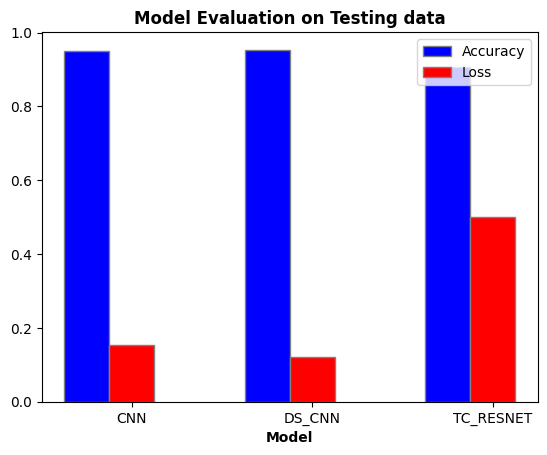

116/116 [==============================] - 1s 4ms/step - loss: 0.1022 - accuracy: 0.9783


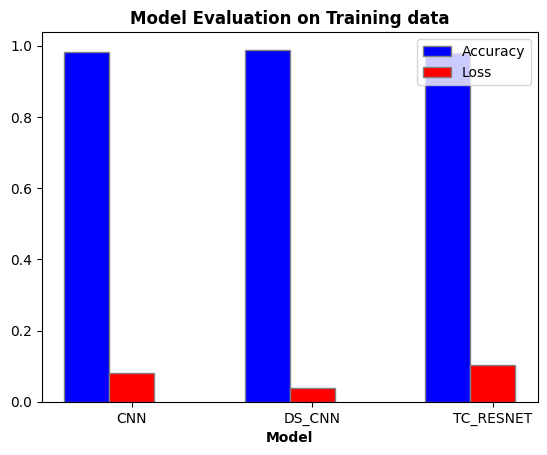

In [24]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_ds_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_tc_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# evaluate model
res = []

res.append(model_cnn.evaluate(X_test, y_test))  
# res.append(model_rnn.evaluate(X_test, y_test))
res.append(model_ds_cnn.evaluate(X_test, y_test))
res.append(model_tc_resnet.evaluate(X_test, y_test))    




print()
print()
print("===============run time =====================")
# test time, use X_train for larger dataset
import time
start = time.time()
model_cnn.predict(X_train)
end = time.time()
print('CNN:', end - start)
print()
# start = time.time()
# model_rnn.predict(X_train)
# end = time.time()
# print('CRNN:', end - start)

start = time.time()
model_ds_cnn.predict(X_train)
end = time.time()
print('DS_CNN:', end - start)
print()

start = time.time()
model_tc_resnet.predict(X_train)
end = time.time()
print('TC_Resnet:', end - start)


import matplotlib.pyplot as plt

fig, ax = plt.subplots()
barWidth = 0.25
r1 = np.arange(len(res))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


plt.bar(r1, [x[1] for x in res], color='b', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, [x[0] for x in res], color='r', width=barWidth, edgecolor='grey', label='Loss')


plt.title('Model Evaluation on Testing data', fontweight='bold')
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(res))], ['CNN', 'DS_CNN', 'TC_RESNET'])
plt.legend()
plt.show()




res_train = []
res_train.append(model_cnn.evaluate(X_train, y_train))
# res_train.append(model_rnn.evaluate(X_train, y_train))
res_train.append(model_ds_cnn.evaluate(X_train, y_train))
res_train.append(model_tc_resnet.evaluate(X_train, y_train))

fig, ax = plt.subplots()
barWidth = 0.25
r1 = np.arange(len(res_train))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, [x[1] for x in res_train], color='b', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, [x[0] for x in res_train], color='r', width=barWidth, edgecolor='grey', label='Loss')

plt.title('Model Evaluation on Training data', fontweight='bold')
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(res_train))], ['CNN', 'DS_CNN', 'TC_RESNET'])
plt.legend()
plt.show()
    



    

29/29 [==============================] - 0s 5ms/step
CNN
Accuracy: 0.9511930585683297
Precision: 0.9528195351131861
Recall: 0.9511930585683297
F1-score: 0.9508853037129059


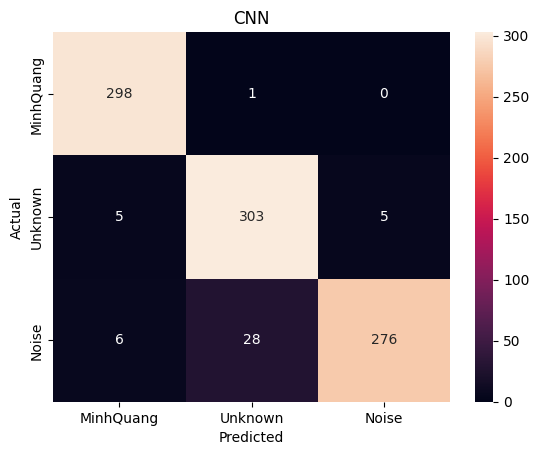

In [25]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np

y_pred = model_cnn.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Metrics accuracy precision, recall, f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('CNN')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label, yticklabels=label)
plt.title('CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()







29/29 [==============================] - 0s 5ms/step
DS_CNN
Accuracy: 0.9533622559652929
Precision: 0.9535415919921754
Recall: 0.9533622559652929
F1-score: 0.9532143237343409


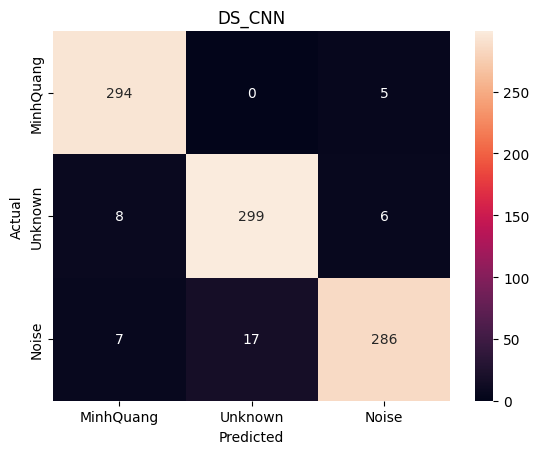

In [26]:

y_pred = model_ds_cnn.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Metrics accuracy precision, recall, f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print('DS_CNN')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label, yticklabels=label)
plt.title('DS_CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




29/29 [==============================] - 0s 3ms/step
TC_ResNet
Accuracy: 0.9067245119305857
Precision: 0.9079752130381454
Recall: 0.9067245119305857
F1-score: 0.907063991904694


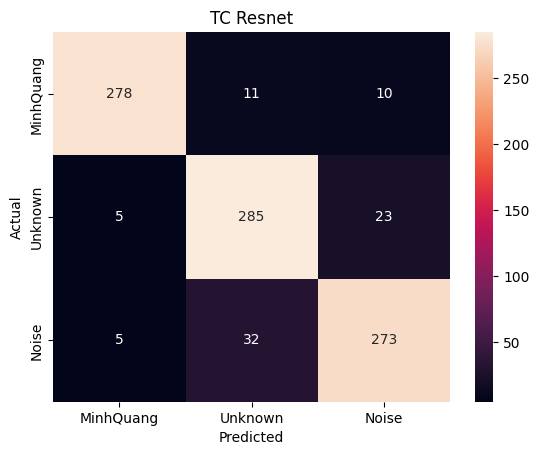

In [27]:
y_pred = model_tc_resnet.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Metrics accuracy precision, recall, f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('TC_ResNet')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label, yticklabels=label, )
plt.title('TC Resnet')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
model_ds_cnn.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 650)]             0         
                                                                 
 reshape_23 (Reshape)        (None, 50, 13, 1)         0         
                                                                 
 gaussian_noise_14 (Gaussia  (None, 50, 13, 1)         0         
 nNoise)                                                         
                                                                 
 conv_1 (Conv2D)             (None, 25, 13, 16)        640       
                                                                 
 conv_1_bn (BatchNormalizat  (None, 25, 13, 16)        64        
 ion)                                                            
                                                                 
 conv_1_relu (ReLU)          (None, 25, 13, 16)        0  